#### Importando as bibliotecas

In [50]:
import pandas as pd
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from IPython.display import Audio

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

#### TESS

In [2]:
TESS = 'Data_sets/TESS_Dataset/'

In [3]:
tess_directory_list = os.listdir(TESS)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(TESS + dir) #/TESS_Dataset/ dir = YAF_angry
    for file in directories:
        part = file.split('.')[0]  #YAF_mouse_angry . wav [0]
        part = part.split('_')[2]  #YAF _ mouse _ 'angry' [2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(TESS + dir + '/' + file)

# dataframe para os arquivos de emoções
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe para o caminho dos arquivos
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenando os dois
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.shape

(2800, 2)

#### RAVDESS

In [4]:
RAVDESS = 'Data_sets/RAVDESS_Dataset/'

In [5]:
# 03-01-06-01-02-01-12.wav --> emotion => terceiro número
# Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised)

ravdess_directory_list = os.listdir(RAVDESS)
rav_emotion = []
rav_path = []

ravdess_emotions_mapping = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fear',
    '07': 'disgust',
    '08': 'surprise'
}

for dir in ravdess_directory_list:
    list_of_files = os.listdir(RAVDESS + "/" + dir)
    for file in list_of_files:
        part = file.split('.')[0]
        part = part.split('-')[2]
        if part == '02':    # não adiciona o arquivo se a emocao for igual a calm
            continue
        else:
            rav_emotion.append(ravdess_emotions_mapping[part])
            rav_path.append(RAVDESS + '/' + dir + '/' + file)

# dataframe for emotion of files
rav_emotion_df = pd.DataFrame(rav_emotion, columns=['Emotions'])

# dataframe for path of files.
rav_path_df = pd.DataFrame(rav_path, columns=['Path'])

# concatenating
rav_df = pd.concat([rav_emotion_df, rav_path_df], axis=1)
rav_df.shape

(1248, 2)

#### SAVEE

In [6]:
SAVEE = 'Data_sets/SAVEE_Dataset/'

In [7]:
import re

savee_emotions_mapping = {
    'a': 'angry',
    'd': 'disgust',
    'f': 'fear',
    'h': 'happy',
    'n': 'neutral',
    'sa': 'sad',
    'su': 'surprise'
}

savee_directory_list = os.listdir(SAVEE)
savee_emotion = []
savee_path = []

for dir in savee_directory_list:
    if dir == "Info.txt": continue
    list_of_files = os.listdir(SAVEE + "/" + dir)
    for file in list_of_files:
        root = os.path.splitext(file)[0]
        suffix = re.findall(r'[a-zA-Z]+', root)[0]
        savee_emotion.append(savee_emotions_mapping[suffix])
        savee_path.append(SAVEE + '/' + dir + '/' + file)

# dataframe for emotion of files
savee_emotion_df = pd.DataFrame(savee_emotion, columns=['Emotions'])

# dataframe for path of files.
savee_path_df = pd.DataFrame(savee_path, columns=['Path'])

# concatenating
savee_df = pd.concat([savee_emotion_df, savee_path_df], axis=1)
savee_df.shape

(480, 2)

#### CREMA D

In [8]:
CREMA_D = 'Data_sets/CREMA-D_Dataset/'

In [9]:
crema_emotions_mapping = {
    'SAD': 'sad',
    'NEU': 'neutral',
    'HAP': 'happy',
    'FEA': 'fear',
    'DIS': 'disgust',
    'ANG': 'angry'
}

crema_emotion = []
crema_path = []

for file in os.listdir(CREMA_D):
    root = os.path.splitext(file)[0]
    part = root.split('_')[2]
    crema_emotion.append(crema_emotions_mapping[part])
    crema_path.append(CREMA_D + '/' + file)

# dataframe for emotion of files
crema_emotion_df = pd.DataFrame(crema_emotion, columns=['Emotions'])

# dataframe for path of files.
crema_path_df = pd.DataFrame(crema_path, columns=['Path'])

# concatenating
crema_df = pd.concat([crema_emotion_df, crema_path_df], axis=1)
crema_df.shape

(7442, 2)

#### Concatenando Datasets

In [10]:
lista_datasets = [Tess_df, rav_df, savee_df, crema_df]

In [11]:
all_df = pd.concat(lista_datasets, ignore_index=True)

In [12]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11970 entries, 0 to 11969
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotions  11970 non-null  object
 1   Path      11970 non-null  object
dtypes: object(2)
memory usage: 187.2+ KB


#### Contagem de emoções

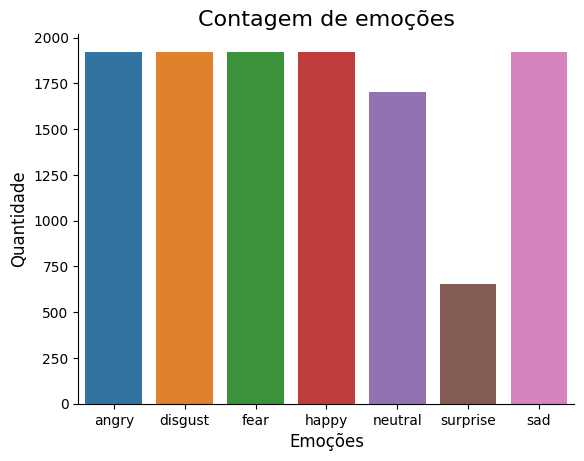

In [13]:
plt.title("Contagem de emoções", size=16)
sns.countplot(x="Emotions", hue="Emotions", data=all_df)
plt.ylabel("Quantidade", size=12)
plt.xlabel("Emoções", size=12)
sns.despine(top=True, right=True, left= False, bottom= False)
plt.show()

#### Gráficos de Ondas e Espectrogramas (Waveplots and Spectograms)

In [14]:
# Waveplots - Waveplots nos informam o volume do áudio em um determinado momento.

def create_waveplot(data, sample_rate, emotion):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(emotion), size=15)
    librosa.display.waveshow(data, sr=sample_rate) # utiliza o método waveshow para plotar a onda sonora. data = dados do áudio; sr= frequência do áudio
    plt.show()

In [15]:
#  Spectograms - Um espectrograma é uma representação visual do espectro de frequências
#   de som ou outros sinais conforme variam com o tempo. É uma representação de frequências
#   que mudam em relação ao tempo para determinados sinais de áudio/música.

def create_spectrogram(data, sample_rate, emotion):
    # A função STFT converte os dados em transformada de Fourier de curto termo
    # A STFT divide o sinal em segmentos curtos de tempo e calcula o espectro de frequências para cada segmento.
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X)) # Convertendo os valores de amplitude em decibéis (dB)
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(emotion), size=15)
    librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='log') # Transforma a escala do eixo vertical em logarítmica, o que pode ser útil para enfatizar frequências mais baixas.
    plt.colorbar(format="%+2.0f dB")

In [16]:
unique_emotions = all_df['Emotions'].unique()
unique_emotions

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad'],
      dtype=object)

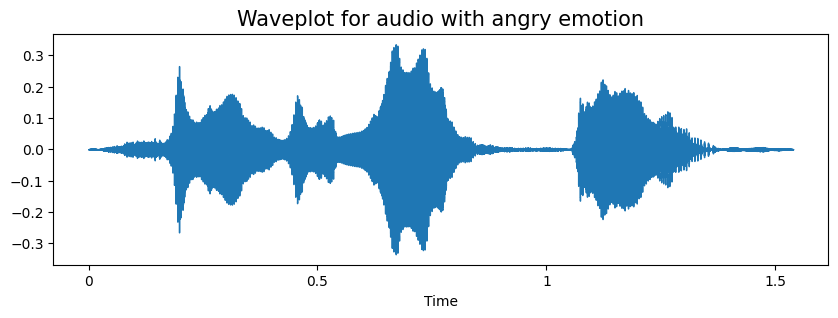

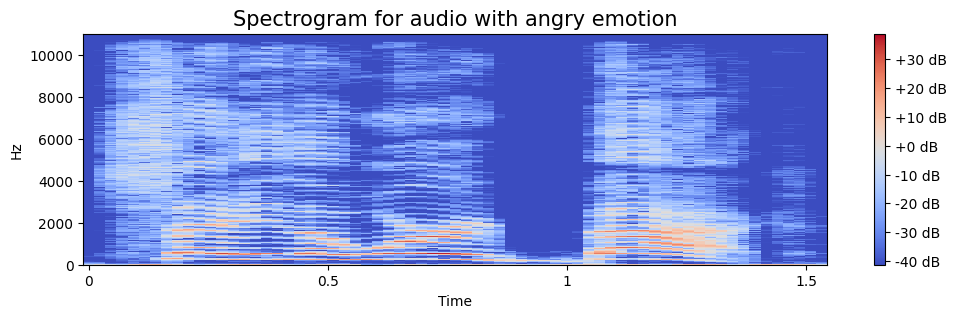

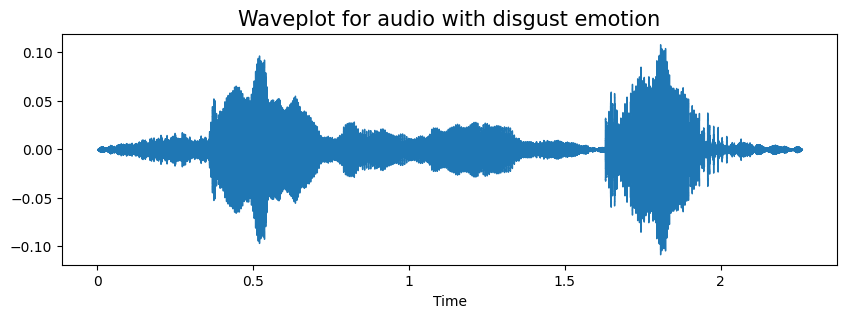

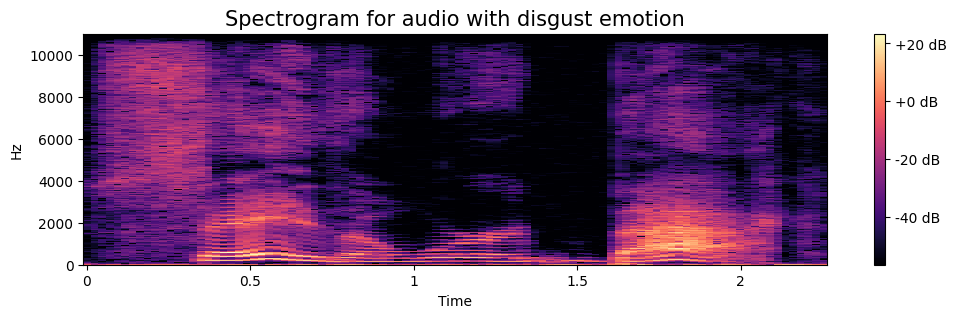

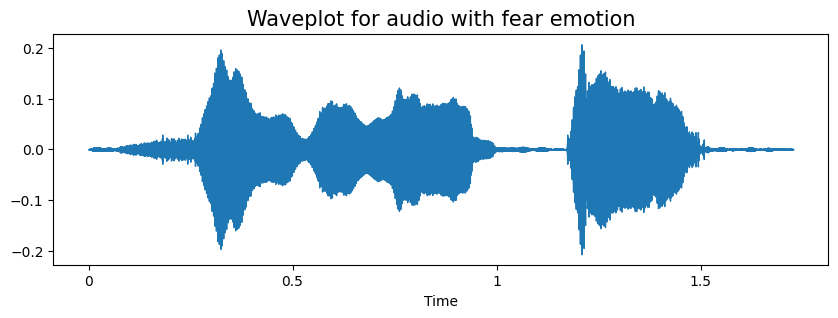

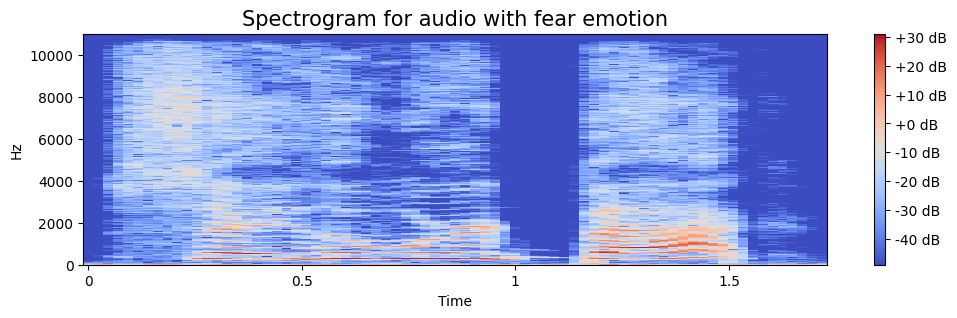

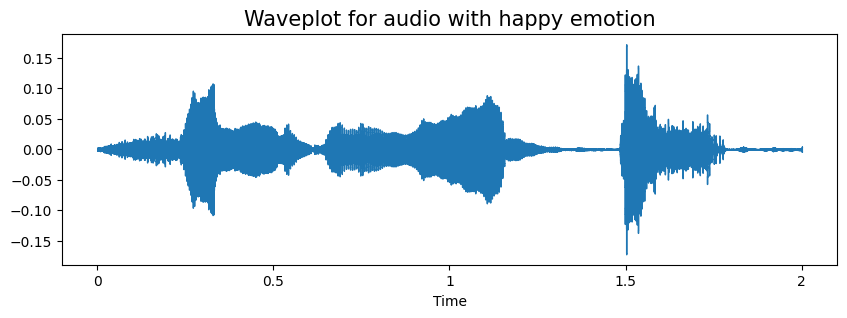

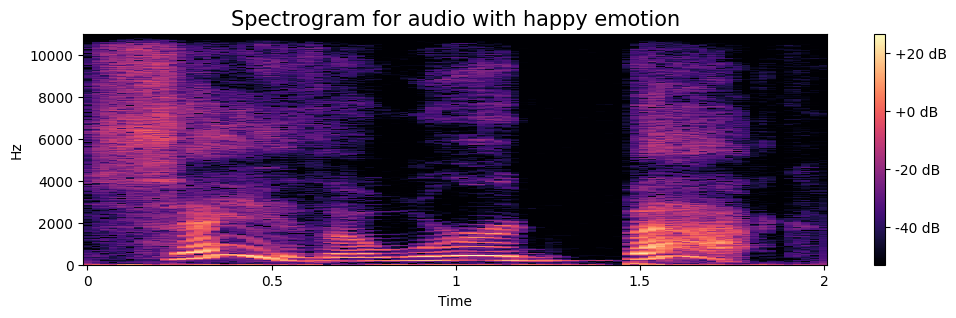

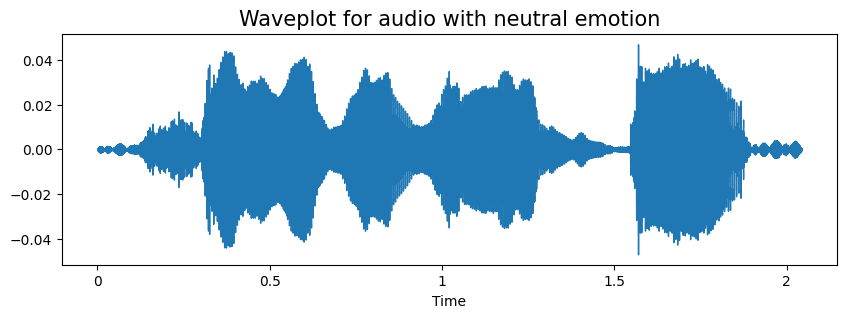

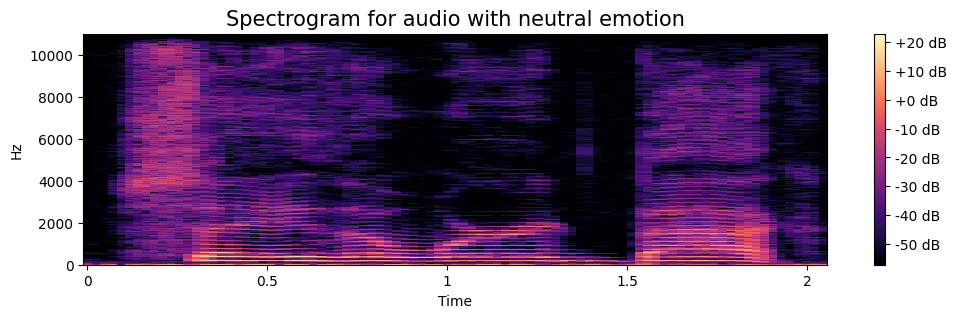

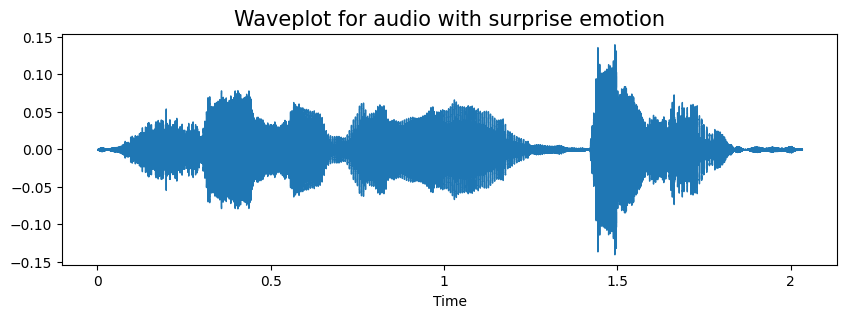

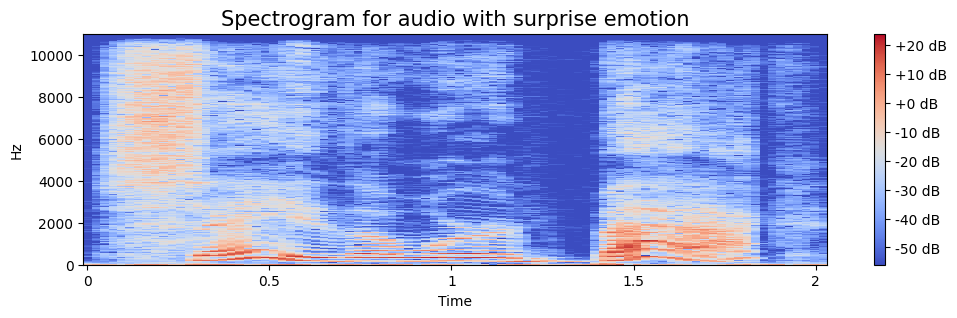

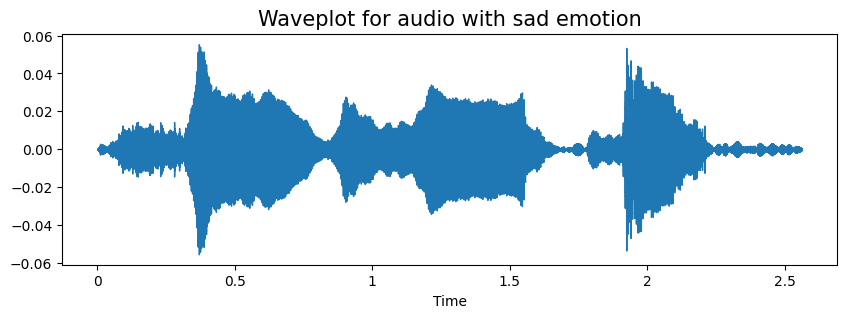

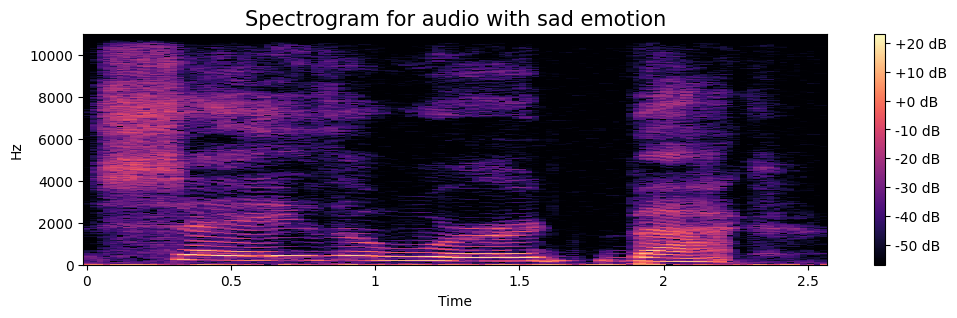

In [17]:
for emotion in unique_emotions:
    paths = np.array(all_df.Path[all_df.Emotions==emotion])[:1] # seleciona o 1 elemento de cada emoção para plotar
    for path in paths:
        data, sampling_rate = librosa.load(path)
        create_waveplot(data, sampling_rate, emotion)
        create_spectrogram(data, sampling_rate, emotion)
        display(Audio(path))

#### Aumento de Dados (Data Augmentation)

Aumento de dados é um processo no qual criamos exemplos adicionais de dados sintéticos aplicando pequenas perturbações ao nosso conjunto de treinamento original.

Para gerar dados sintéticos de áudio, podemos empregar técnicas como injeção de ruído, deslocamento temporal, modificação do tom e variação da velocidade.

O objetivo dessas técnicas é tornar o modelo robusto a tais perturbações, melhorando sua capacidade de generalização. É crucial que as perturbações aplicadas preservem o rótulo original das amostras de treinamento para garantir a integridade dos dados.

Inicialmente, devemos avaliar quais técnicas de aumento de dados são mais eficazes para o nosso conjunto de dados específico. Para isso, realizaremos experimentos controlados aplicando diferentes perturbações e medindo o impacto no desempenho do modelo.

In [18]:
def noise(data):
    # calcula a amplitude do ruído
    noise_amp = 0.035*np.random.uniform()*np.amax(data) # 0.035(uma constante que controla a intensidade do ruído) * valor aleatório * valor máximo dos dados, para escalar o ruído de forma relativa à amplitude máxima do sinal original.
    data = data + noise_amp*np.random.normal(size=data.shape[0]) # Adiciona o ruído ao sinal original.
    return data

In [19]:
def stretch(data, rate=0.8):
    # modifica a velocidade de reprodução do sinal de áudio sem alterar seu tom.
    return librosa.effects.time_stretch(data, rate=rate)

In [20]:
def shift(data):
    # utiliza np.roll para aplicar um deslocamento aleatório no tempo do sinal de áudio. O deslocamento é determinado por um valor aleatório entre -5000 e 5000 amostras.
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

In [21]:
# Altera o tom (pitch) do sinal de áudio data sem alterar sua duração. A mudança de tom é controlada pelo pitch_factor.
# Positivo aumenta o tom, negativo diminui
def pitch(data, sampling_rate, pitch_factor=0.9):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

In [22]:
# pegando qualquer exemplo e verificando as técnicas
path = path_df['Path'][1111]
data, sample_rate = librosa.load(path)

##### Gráficos

1. Simple Audio

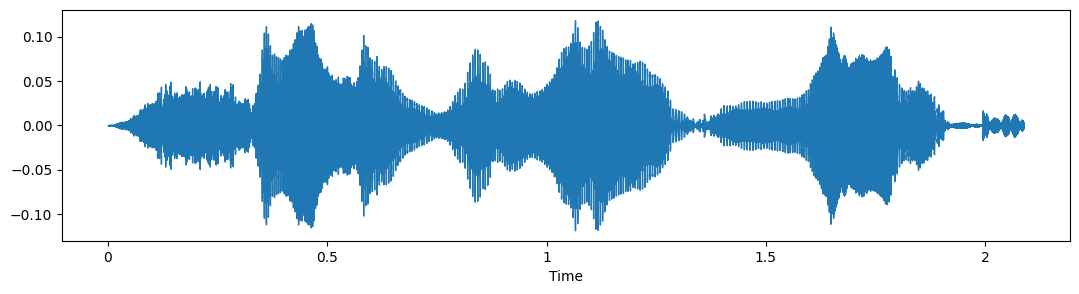

In [23]:
plt.figure(figsize=(13,3))
librosa.display.waveshow(y=data, sr= sample_rate)
display(Audio(path))

2. Noise Injection

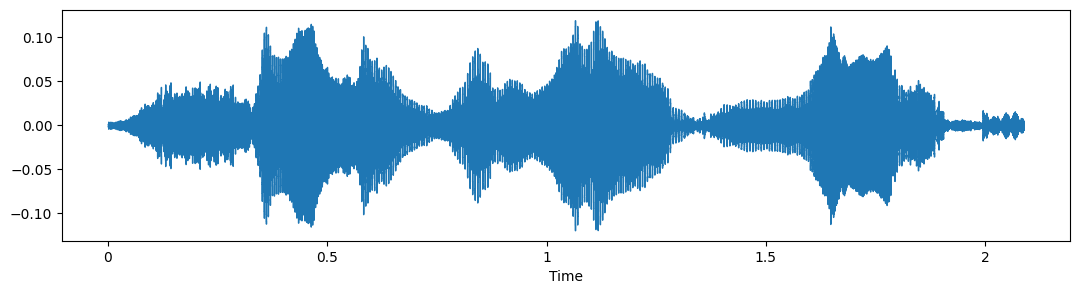

In [24]:
x = noise(data)
plt.figure(figsize=(13,3))
librosa.display.waveshow(y=x, sr= sample_rate)
display(Audio(x, rate = sample_rate))

3. Stretching

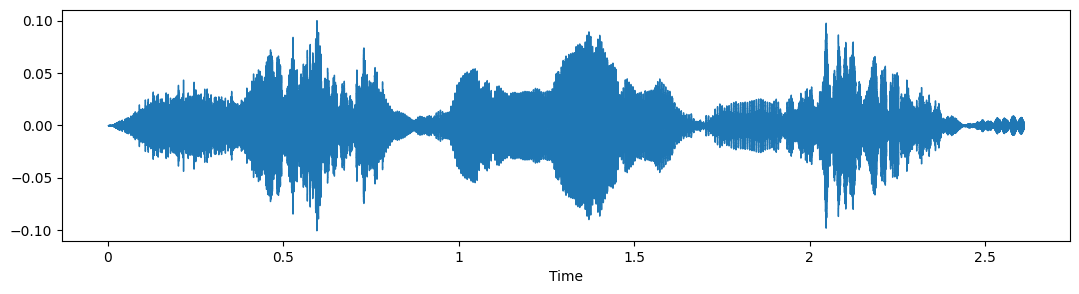

In [25]:
x = stretch(data)
plt.figure(figsize=(13,3))
librosa.display.waveshow(y=x, sr= sample_rate)
display(Audio(x, rate = sample_rate))

4. Shifting

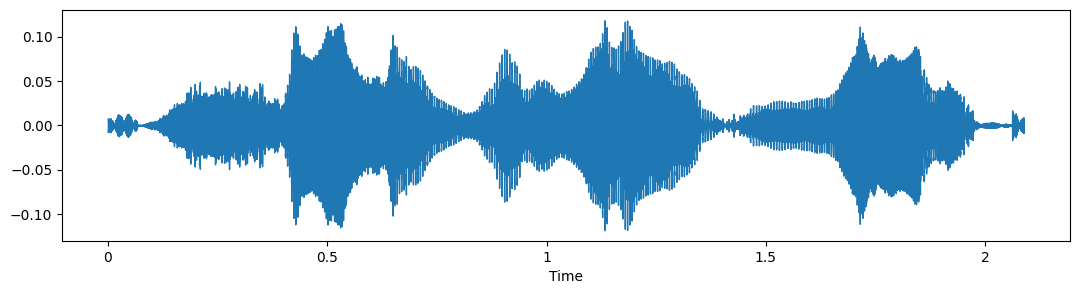

In [26]:
x = shift(data)
plt.figure(figsize=(13,3))
librosa.display.waveshow(y=x, sr= sample_rate)
display(Audio(x, rate = sample_rate))

5. Pitch

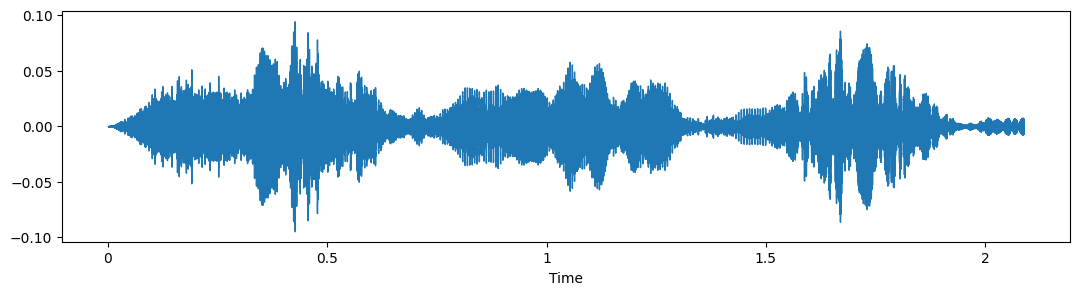

In [27]:
x = pitch(data, sample_rate)
plt.figure(figsize=(13,3))
librosa.display.waveshow(y=x, sr= sample_rate)
display(Audio(x, rate = sample_rate))

#### Extração de características (Feature Extraction)

O sinal de áudio, ao ser capturado, pode ser representado através de três principais grandezas: tempo, amplitude e frequência. Podemos enxergar o som como um conjunto de ondas (frequência), que possuem uma determinada energia (amplitude), em um dado momento no tempo, sendo que estas propriedades variam ao longo do eixo do tempo.

Existem representações como os waveplots/waveforms, que representam apenas duas propriedades do som, a amplitude e o tempo, mostrando a evolução da energia dentro da janela de tempo investigada. Isto nos diz que diferentes formas de apresentar as informações podem nos ajudar a enxergar características antes escondidas, ou que eram mais difíceis de ver em meio a outras informações.

A Extração de Características em áudio busca ressaltar certas características do som investigado. No projeto, foram usadas cinco features:

- *Zero Crossing Rate:* mede a quantidade de vezes que um sinal cruza o eixo X (y = 0). Ajuda a diferenciar a presença de sons tonais e sons percussivos, e entre sons de baixa frequência e alta frequência. Sons tonais e os de baixa frequência tendem a possuir uma taxa de Zero Crossing mais baixo, enquanto sons percussivos e de alta frequência possuem uma taxa de Zero Crossing mais alta.
- *MFCC (Mel-Frequency Cepstral Coefficients):* mede a quantidade de energia distribuída ao longo do Coeficientes Cepstral, que agregam uma série de transformações como Mel-Scaling, Log Amplitude, FFT e DCT. O MFCC auxilia a identificar as formantes mais importantes do som.
- *Delta e Delta²:* o delta é análogo à primeira derivada do MFCC e o delta² à segunda derivada, ou seja, eles calculam as taxas de variação instantânea do MFCC. São features que auxiliam a fornecer informações sobre como as componentes espectrais evoluem ao longo do tempo.
- *RMS (Root-Mean-Square):* calcula a energia dos samples/frames e depois tira a raiz quadrada. É um indicativo do loudness do trecho, ou seja, um indicativo da impressão de intensidade sonora.


In [28]:
def extract_features(data):
    result = np.array([])

#-----------------------Zero Crossing Rate--------------------------------------

    #   A função 'librosa.feature.zero_crossing_rate' retorna um array 2D, onde cada coluna corresponde à ZCR de uma janela do sinal de áudio.
    #   Transpor essa matriz com .T significa que agora cada linha corresponde à ZCR de uma janela.
    #   Ao aplicar np.mean(..., axis=0) calcula a média da ZCR ao longo do tempo para todo o sinal de áudio.
    #   Isso garante que a média da ZCR é calculada de forma que represente adequadamente a média das taxas de cruzamento por zero ao longo de todo o sinal de áudio.
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)


    #   Utilizamos (np.hstack) para concatenar arrays lado a lado, aumentando o número de colunas.
    #   Pois estamos construindo um vetor de características agregando diferentes tipos de características extraídas dos dados de áudio em um único array. (result)
    result=np.hstack((result, zcr))

# ----------------------MFCC----------------------------------------------------

    #   Coeficientes Cepstrais de Frequência Mel (MFCCs)
    #   MFCCs são uma representação do espectro de potência de um sinal de áudio, que é modelado em uma escala de frequência Mel (aproximando a percepção humana de som).
    #   Cada linha representa uma janela de tempo e cada coluna representa um coeficiente MFCC.
    #   Resultado é a média de cada coluna ao longo de todas as janelas de tempo, resultando em um vetor de médias dos coeficientes MFCC.
    
    mfcc = librosa.feature.mfcc(y=data, sr=sample_rate)
    mfccs_delta = librosa.feature.delta(mfcc)
    mfccs_delta2 = librosa.feature.delta(mfcc, order=2)
    
    # Calculate the mean across time for each set of coefficients
    mfccs_mean = np.mean(mfcc, axis=1)
    mfccs_delta_mean = np.mean(mfccs_delta, axis=1)
    mfccs_delta2_mean = np.mean(mfccs_delta2, axis=1)
    
    result = np.hstack((result, mfccs_mean))
    result = np.hstack((result, mfccs_delta_mean))
    result = np.hstack((result, mfccs_delta2_mean))
    
# ----------------------Root Mean Square Value----------------------------------

    #   RMS é uma medida da energia do sinal de áudio e é calculado como a raiz quadrada da média dos quadrados dos valores do sinal.
    #   Resultado é um vetor onde cada elemento é a média do RMS ao longo do tempo.
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)

    result = np.hstack((result, rms))


# ----------------------MelSpectogram-------------------------------------------

    #   Calcula o espectrograma Mel do sinal de áudio para cada janela de tempo
    #   A matriz resultante é transposta para que cada linha represente uma janela de tempo e cada coluna represente uma banda de frequência Mel.
    mel = np.mean(librosa.power_to_db(librosa.feature.melspectrogram(y=data, sr=sample_rate)).T, axis=0)

    result = np.hstack((result, mel))
# ------------------------------------------------------------------------------
    return result

In [29]:
def get_features(path):    
    data, sample_rate = librosa.load(path)

    # sem aumento
    res1 = extract_features(data)
    result = np.array(res1)

    # dados com ruído
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))

    # dados com stretching e pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3))

    # dados com shift
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))
    
    return result

In [30]:
X, y = [], []
for path, emotion in zip(all_df.Path, all_df.Emotions):
    feature = get_features(path)
    for element in feature:
        X.append(element)
        y.append(emotion)

#### Empilhamento Horizontal/Vertical

- Empilhamento Horizontal: Dentro da função ***extract_features***, diferentes características são extraídas e empilhadas lado a lado para formar um vetor completo de características de um único sinal de áudio.
<br><br>
- Empilhamento Vertical: Dentro da função ***get_features***, características de diferentes versões do mesmo áudio (original, com ruído, esticado e com alteração de altura) são empilhadas uma embaixo da outra para criar um conjunto de dados robusto.
<br><br>
No final, cada linha do conjunto de dados resultante representa as características de uma versão do sinal de áudio, e cada coluna representa uma característica específica. Isso prepara os dados para serem usados em modelos de aprendizado de máquina.

In [31]:
Features = pd.DataFrame(X)
Features['labels'] = y
Features.to_csv('colab.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,labels
0,0.085165,-383.432617,52.460808,-17.608944,-11.810311,-4.707630,7.513892,-25.082636,-6.948459,-10.093307,...,-42.987827,-42.589764,-42.761391,-42.644554,-42.371216,-42.944077,-43.822220,-46.160084,-51.553963,angry
1,0.222132,-245.305220,26.341526,-5.331743,-9.866795,-1.969797,1.688844,-9.770615,-7.134136,-4.571492,...,-25.031644,-25.278080,-25.409925,-25.345092,-25.244692,-25.235558,-25.112535,-25.205258,-25.650385,angry
2,0.104333,-433.093079,60.777626,-26.449995,-18.615715,-3.386469,4.899543,-31.537992,-7.582217,-11.809030,...,-51.637188,-50.320587,-49.180157,-49.460567,-49.188751,-48.283596,-48.027554,-51.316322,-59.975063,angry
3,0.083008,-380.702637,54.091053,-16.841614,-11.104561,-4.223928,7.849674,-24.921177,-6.639303,-10.038727,...,-42.858841,-42.501915,-42.666969,-42.548687,-42.302898,-42.887440,-43.765701,-46.127449,-51.567516,angry
4,0.093492,-444.550079,65.292038,-2.571654,-20.355955,-10.516433,10.241208,-9.607937,-1.355310,-12.456924,...,-45.830914,-46.616570,-47.471203,-49.338211,-49.946762,-49.904854,-50.589756,-52.244652,-58.779846,angry


In [32]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47880 entries, 0 to 47879
Columns: 191 entries, 0 to labels
dtypes: float64(190), object(1)
memory usage: 69.8+ MB


In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Features['labels'] = encoder.fit_transform(Features['labels'])

In [34]:
X = Features.iloc[:, :-1].values
y = Features.iloc[:, -1].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, shuffle=True) #80 treino 20 teste

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38304, 190), (9576, 190), (38304,), (9576,))

In [37]:
dataset ={
    'ALL' : (X_train, X_test, y_train, y_test),
}

In [73]:
tree = DecisionTreeClassifier(random_state=0)
neighbor = KNeighborsClassifier()
svc = SVC()
mlpc = MLPClassifier(random_state=0, max_iter=5000)
rfc = RandomForestClassifier(random_state=0)

In [74]:
tree_grid = {'classifier__criterion': ['entropy'],
             'classifier__max_depth': [3, 7, 9]}

KNC_grid = {'classifier__n_neighbors': [1],
            'classifier__p':[1,2]}

SVC_grid = {'classifier__kernel':['rbf', 'sigmoid'],
            'classifier__C':[3,7]}

MLPC_grid = {'classifier__hidden_layer_sizes':[50,30,10]}

RF_grid = {'classifier__n_estimators': [100, 200],
           'classifier__max_features': ['sqrt', 'log2'],
           'classifier__min_samples_split': [5, 10]}

In [75]:
classifiers_grids ={
    tree : tree_grid,
    neighbor : KNC_grid,
    svc : SVC_grid,
    mlpc : MLPC_grid,
    rfc : RF_grid,
}

In [46]:
scorers = {
    'f1_weighted': make_scorer(f1_score, average='weighted'),    
}

    f1_weighted: Calcula a métrica F1 para cada classe e depois faz a média ponderada dessas métricas, onde os pesos são determinados pelo número de instâncias em cada classe. Dando importância maior as classes com mais instâncias.

In [57]:
def perform_grid_search(dataset, classifiers_grids, scorer_name, output_file):      
    results = []
    
    file_exists = os.path.isfile(output_file)

    for dataset_name, (X_train, X_test, y_train, y_test) in dataset.items():
        for classifier, grid in classifiers_grids.items():
            print(f"Performing Grid Search for {classifier.__class__.__name__} on {dataset_name} using {scorer_name}")

            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('classifier', classifier)
            ])

            grid_search = GridSearchCV(pipeline, grid, scoring=scorers[scorer_name], cv=5, n_jobs= -1)
            grid_search.fit(X_train, y_train)

            y_predict = grid_search.predict(X_test)

            # Calcula as métricas de avaliação
            accuracy = accuracy_score(y_test, y_predict)
            precision = precision_score(y_test, y_predict, average='weighted')
            recall = recall_score(y_test, y_predict, average='weighted')
            f1 = f1_score(y_test, y_predict, average='weighted')

            best_params = grid_search.best_params_
            best_score = grid_search.best_score_

            result = (classifier.__class__.__name__, dataset_name, X_train.shape[0], X_train.shape[1], 
                      len(np.unique(y_train)), best_params, best_score, accuracy, precision, recall, f1)

            results.append(result)

            with open(output_file, mode='a', newline='') as file:
                writer = csv.writer(file)
                # Escreve o cabeçalho se o arquivo for novo
                if not file_exists:
                    writer.writerow(['Classificador', 'Conjunto', 'Instâncias', 'Atributos', 'Classes', 
                                     'Melhor Configuração', 'Melhor Pontuação', 'Acurácia', 'Precisão', 
                                     'Recall', 'F1-Score'])
                    file_exists = True
                writer.writerow(result)   

    return results

In [58]:
output_file = 'grid_search_results_f1_weighted.csv'

In [59]:
results_f1_weighted = perform_grid_search(dataset, classifiers_grids, 'f1_weighted', output_file)
results_df_f1_weighted = pd.DataFrame(results_f1_weighted, columns=[
    'Classificador', 'Conjunto', 'Instâncias', 'Atributos', 'Classes', 'Melhor Configuração', 
    'Melhor Pontuação', 'Acurácia', 'Precisão', 'Recall', 'F1-Score'])

Performing Grid Search for DecisionTreeClassifier on ALL using f1_weighted
Performing Grid Search for KNeighborsClassifier on ALL using f1_weighted
Performing Grid Search for SVC on ALL using f1_weighted
Performing Grid Search for MLPClassifier on ALL using f1_weighted
Performing Grid Search for RandomForestClassifier on ALL using f1_weighted


In [62]:
results_df_f1_weighted

,Classificador,Conjunto,Instâncias,Atributos,Classes,Melhor Configuração,Melhor Pontuação,Acurácia,Precisão,Recall,F1-Score
0,DecisionTreeClassifier,ALL,38304,190,7,"{'classifier__criterion': 'entropy', 'classifi...",0.475720,0.502715,0.523195,0.502715,0.490327
1,KNeighborsClassifier,ALL,38304,190,7,"{'classifier__n_neighbors': 1, 'classifier__p'...",0.655136,0.699875,0.703737,0.699875,0.700111
2,SVC,ALL,38304,190,7,"{'classifier__C': 7, 'classifier__kernel': 'rbf'}",0.628053,0.642439,0.643620,0.642439,0.640558
3,MLPClassifier,ALL,38304,190,7,{'classifier__hidden_layer_sizes': 50},0.607901,0.633041,0.632487,0.633041,0.631256
4,RandomForestClassifier,ALL,38304,190,7,"{'classifier__max_features': 'sqrt', 'classifi...",0.702325,0.747911,0.753842,0.747911,0.745840
